
# N0 configuration with PML

Trying to add exacty PML.  At the moment debugging.

In [85]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton
from scipy.linalg import null_space

In [2]:
n_air = 1.00027717
n_glass = 1.4388164768221814

In [52]:
ts = [4.0775e-05, 2e-5, 1e-5]
rhos =[sum(ts[:i]) for i in range(1, len(ts)+1)]
mats = ['air', 'glass', 'glass']
ns = [lambda x:n_air, lambda x:n_glass, lambda x:n_glass]
maxhs = [.1,.03, .02]
pml = {'alpha':1, 'R0':rhos[-2]}

In [53]:
A = BraggExact(ts=ts, mats=mats, ns=ns, maxhs=maxhs, wl=7.2e-6)


In [54]:
A.rhos/A.scale

array([2.71833333, 4.05166667, 4.71833333])

In [55]:
k_low = A.k0 * A.ns[0] * A.scale
k_low

13.093597536773284

In [56]:
outer = 'pcb'
nu = 1

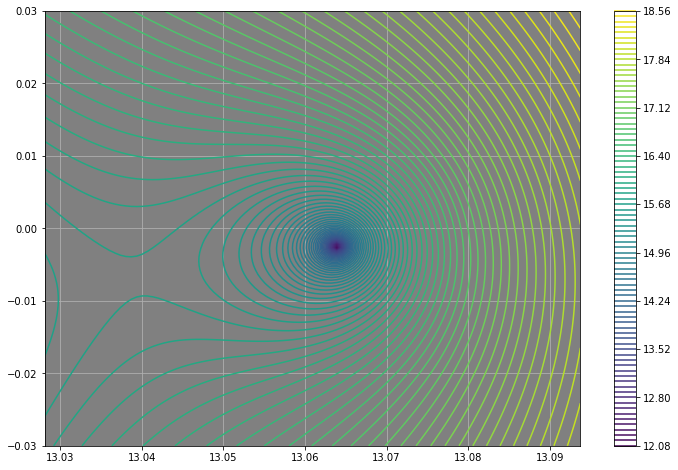

In [68]:
zero_radial=False
plotlogf(A.determinant, .995*k_low, 1.00001*k_low, -.03,.03, nu, outer, pml,zero_radial,
         iref=100, rref=100, levels=100)

In [75]:
guess = np.array(13.06 -.003j)

beta1 = newton(A.determinant, guess, args=(nu, outer, pml, zero_radial), tol = 1e-15)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer, pml, zero_radial)))


Scaled beta:  (13.063852161235948-0.002489461972239958j) . Residual of determinant:  1.3774429321609204e-06


Get coeffs and K for checking.

In [76]:
L, R = A.determinant(beta1, return_matrix=True, zero_radial=zero_radial, outer=outer, nu=nu, pml=pml)

In [77]:
Aa, B = L[..., 0, 0], L[..., 0, 1]
C, D = L[..., 1, 0], L[..., 1, 1]


In [78]:
np.abs(Aa * D - B * C)**2

1.897349031360074e-12

In [79]:
L @ np.array([L[0,1], -L[0,0]])

array([0.00000000e+00+0.00000000e+00j, 9.34582204e-07-1.01188198e-06j])

# Bragg Exact Fields

In [80]:
Fs = A.all_fields(beta1, nu, outer, pml, zero_radial)

In [81]:
Draw(1e1*Fs['Ez'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [82]:
Draw(Fs['Ephi'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [84]:
Draw(Fs['Er'], A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [ ]:
Draw(Fs['Etv'].imag, A.mesh)

In [ ]:
Draw(1e1*Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Hphi'].imag, A.mesh)